# **Backpropagation and Gradient Descent:**
In this module, we will explore how backpropagation functions and how different optimizers impact accuracy by producing varying loss curves.

We have used three optimizers:
1. SGD (Stochastic Gradient Descent)
2. RMSprop (Root Mean Square Propagation)
3. Adam (Adaptive Moment Estimation)

Additionally, we have experimented with various activation functions, including **Tanh and ReLU**

Our primary objective is to minimize the loss function, and backpropagation achieves this by use of **Gradient Descent **for weight optimization.

**1.1  SGD(Stochastic Gradient Descent):**

The loss function obtained here is **0.1554**, which is relatively low, indicating that the model is performing well.  
Further, let's compare the results with other optimizers.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7741 - loss: 0.8706 - val_accuracy: 0.9117 - val_loss: 0.3176
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9127 - loss: 0.3121 - val_accuracy: 0.9288 - val_loss: 0.2624
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9280 - loss: 0.2593 - val_accuracy: 0.9358 - val_loss: 0.2282
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9368 - loss: 0.2229 - val_accuracy: 0.9408 - val_loss: 0.2059
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9434 - loss: 0.2023 - val_accuracy: 0.9465 - val_loss: 0.1874
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9503 - loss: 0.1787 - val_accuracy: 0.9513 - val_loss: 0.1722
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9535 - loss: 0.1666 - val_accuracy: 0.9534 - val_loss: 0.1590
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9580 - loss: 0.

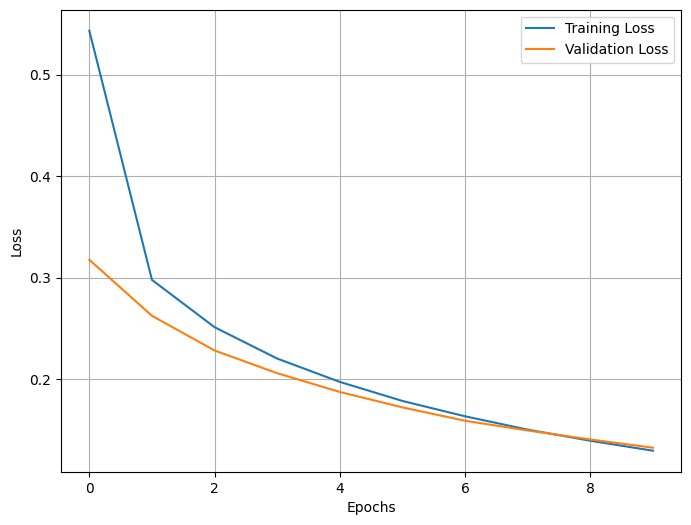

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1554
Test accuracy: 0.9611


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Let's load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images to [0,1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flattening images
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Lets bring a neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model with backpropagation (SGD optimizer)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=20, validation_data=(x_test, y_test), verbose=1)

# Ploting loss curve
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')


 **1.2 RMSprop:**  
The RMSprop optimizer, used with the **Tanh activation function**, resulted in a **loss function of 0.2000**. This slightly higher loss indicates a decline in the model's performance.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9556 - loss: 0.1554
Test accuracy: 0.9611
Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8790 - loss: 0.4225 - val_accuracy: 0.9446 - val_loss: 0.2031
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9497 - loss: 0.1797 - val_accuracy: 0.9474 - val_loss: 0.1830
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9575 - loss: 0.1586 - val_accuracy: 0.9561 - val_loss: 0.1679
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9637 - loss: 0.1362 - val_accuracy: 0.9602 - val_loss: 0.1604
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9674 - loss: 0.1226 - val_accuracy: 0.9604 - val_loss: 0.1600
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9674 - loss: 0.1254 - val_accuracy: 0.9620 - val_loss: 0.1666
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9729 - loss: 0.1023 - val_accuracy: 0.9661 - val

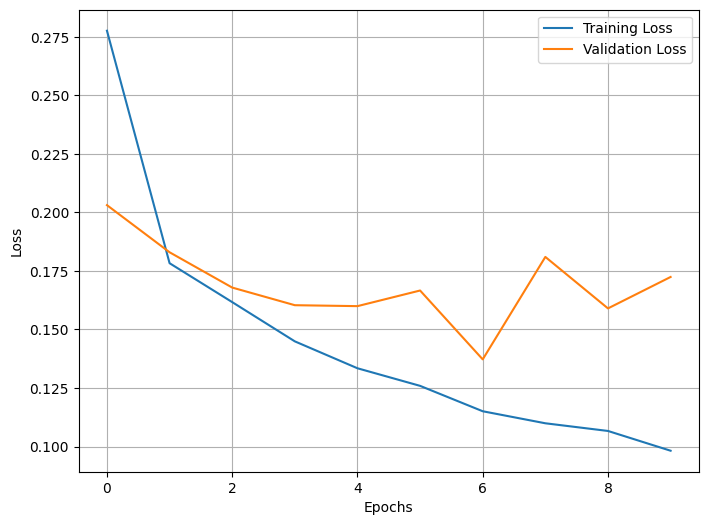

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9600 - loss: 0.2000
Test accuracy: 0.9647


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')
import matplotlib.pyplot as plt

# Lets load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images to [0,1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten images
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Define a simple neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='tanh', input_shape=(784,)),  #tanh activation method is used.
    keras.layers.Dense(10, activation='softmax')
])

# Compile model with backpropagation (RMS optimizer)
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=20, validation_data=(x_test, y_test), verbose=1)

# Plot loss curve
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')


1.2 Adam:  
The optimizer with **ReLU**  was used, resulting in a loss of 0.1129 and an accuracy of 0.9749, indicating the **best performance**. This demonstrates that the Adam optimizer is highly effective for small datasets, offering both speed  and stability due to its combination of SGD and RMS. Additionally, these optimizers are widely used in various machine learning tasks.






Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8872 - loss: 0.3917 - val_accuracy: 0.9627 - val_loss: 0.1207
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9692 - loss: 0.1036 - val_accuracy: 0.9742 - val_loss: 0.0843
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9799 - loss: 0.0682 - val_accuracy: 0.9741 - val_loss: 0.0912
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9850 - loss: 0.0509 - val_accuracy: 0.9762 - val_loss: 0.0812
Epoch 5/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9881 - loss: 0.0373 - val_accuracy: 0.9779 - val_loss: 0.0746
Epoch 6/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9920 - loss: 0.0273 - val_accuracy: 0.9782 - val_loss: 0.0734
Epoch 7/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9934 - loss: 0.0235 - val_accuracy: 0.9771 - val_loss: 0.0829
Epoch 8/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9931 - loss: 0

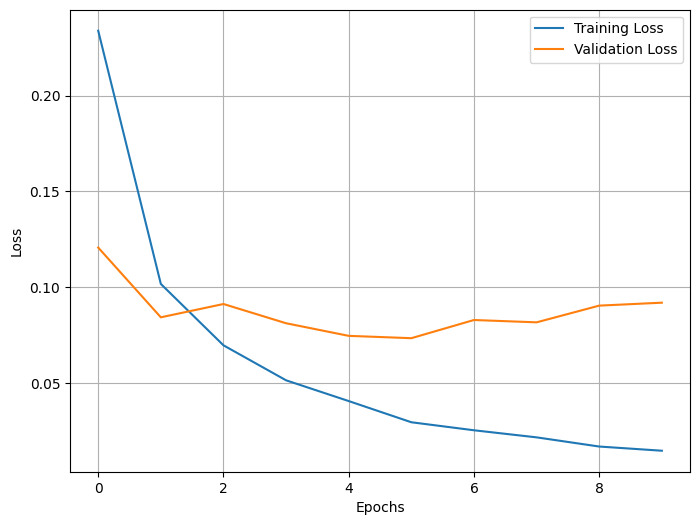

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9749 - loss: 0.1129
Test accuracy: 0.9783


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizing images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flattening images
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

# Define a simple neural network
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model with backpropagation (Adam optimizer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Plot loss curve
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')


# 1.   Here students can try with different batch size but for smaller sets use 10- 50 for better results.

# 2.   If the loss function is very high can try with different learning rate that are 0.001, 0.1.


# ****Conclusion: Adam optimizer + ReLU activation gave the best accuracy.****